Jonathan Sosa  

Jun - July 2023

Stock Predictor


In [27]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# DATA COLLECTION
Fetch data from Yahoo Fiance from different stocks

In [10]:
apple_dta = yf.download('AAPL', start='2010-01-01', end='2023-05-01')
meta_dta = yf.download('META', start='2010-01-01', end='2023-05-01')
nike_dta = yf.download('NKE', start='2010-01-01', end='2023-05-01')
smp500_dta = yf.download('^GSPC', start='2010-01-01', end='2023-05-01')
vanguard_dta = yf.download('VOO', start='2010-01-01', end='2023-05-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
print(apple_dta.head())
print(meta_dta.head())
print(nike_dta.head())
print(smp500_dta.head())
print(vanguard_dta.head())

dta = [apple_dta, meta_dta, nike_dta, smp500_dta, vanguard_dta]

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.496295  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.507524  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.404016  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.392176  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.434674  447610800
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000  573576400
2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999  168192700
2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000  101786600
2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   73600000
2012-05-24  32.950001  33.2

# DATA PROCESSING
handling missing values, converting data types, and creating new features

In [19]:
for d in dta:
    # Add a feature for the previous day's close price
    d['PrevClose'] = d['Close'].shift(1)

    # Add a feature for the change in close price from the previous day
    d['PriceChange'] = d['Close'] - d['PrevClose']
    
    print(d.head())

                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.496295  493729600   
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.507524  601904800   
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.404016  552160000   
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.392176  477131200   
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.434674  447610800   

            PrevClose  PriceChange  
Date                                
2010-01-04        NaN          NaN  
2010-01-05   7.643214     0.013215  
2010-01-06   7.656429    -0.121786  
2010-01-07   7.534643    -0.013929  
2010-01-08   7.520714     0.050000  
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2012-05-18  42.049999  45.000000  38.000000  38.

In [17]:
# Check for missing values
for d in dta:
    print(d.isnull().sum())
   
    # This propagates the last valid observation forward to next valid.
    d.fillna(method='ffill', inplace=True)

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
PrevClose      1
PriceChange    1
dtype: int64
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
PrevClose      1
PriceChange    1
dtype: int64
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
PrevClose      1
PriceChange    1
dtype: int64
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
PrevClose      1
PriceChange    1
dtype: int64
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
PrevClose      1
PriceChange    1
dtype: int64


In [20]:
# Define the size of the test set
test_size = 0.2  # 20% of the data

def split_data(data, test_size):
    '''
    This function takes the data and divides it into test and train datasets
    ----------------
    Inputs:
    data: pandas df
    test_size: float
    -----------------
    Outputs:
    train_data: pandas df
    test_data: pandas df
    '''
    
    # Calculate the index at which to split the data
    split_idx = int(len(data) * (1 - test_size))

    # Split the data
    train_data = data[:split_idx]
    test_data = data[split_idx:]


    return (train_data, test_data)


In [21]:
apple_dta_train, apple_dta_test = split_data(apple_dta, test_size)
meta_dta_train, meta_dta_test = split_data(meta_dta, test_size) 
nike_dta_train, nike_dta_test = split_data(nike_dta, test_size) 
smp500_dta_train, smp500_dta_test = split_data(smp500_dta, test_size)  
vanguard_dta_train, vanguard_dta_test = split_data(vanguard_dta, test_size) 

# DATA ANALYSIS(EDA)
understanding the data by summarizing its main characteristics, often through visual methods

### Apple Stock Analysis 

In [22]:
print(apple_dta.describe())

              Open         High          Low        Close    Adj Close  \
count  3353.000000  3353.000000  3353.000000  3353.000000  3353.000000   
mean     53.707076    54.311310    53.126484    53.744992    51.791305   
std      49.228549    49.864001    48.641289    49.284685    49.675132   
min       6.870357     7.000000     6.794643     6.858929     5.829697   
25%      19.194286    19.339287    19.000000    19.146070    16.756018   
50%      31.100000    31.237499    30.650000    31.062500    28.131510   
75%      66.394997    67.000000    65.750000    66.572502    65.130692   
max     182.630005   182.940002   179.119995   182.009995   180.434280   

             Volume    PrevClose  PriceChange  
count  3.353000e+03  3352.000000  3352.000000  
mean   2.516429e+08    53.710405     0.048340  
std    2.218363e+08    49.251322     1.431575  
min    3.519590e+07     6.858929   -10.519997  
25%    9.884470e+07    19.144910    -0.228036  
50%    1.626192e+08    31.061250     0.021964

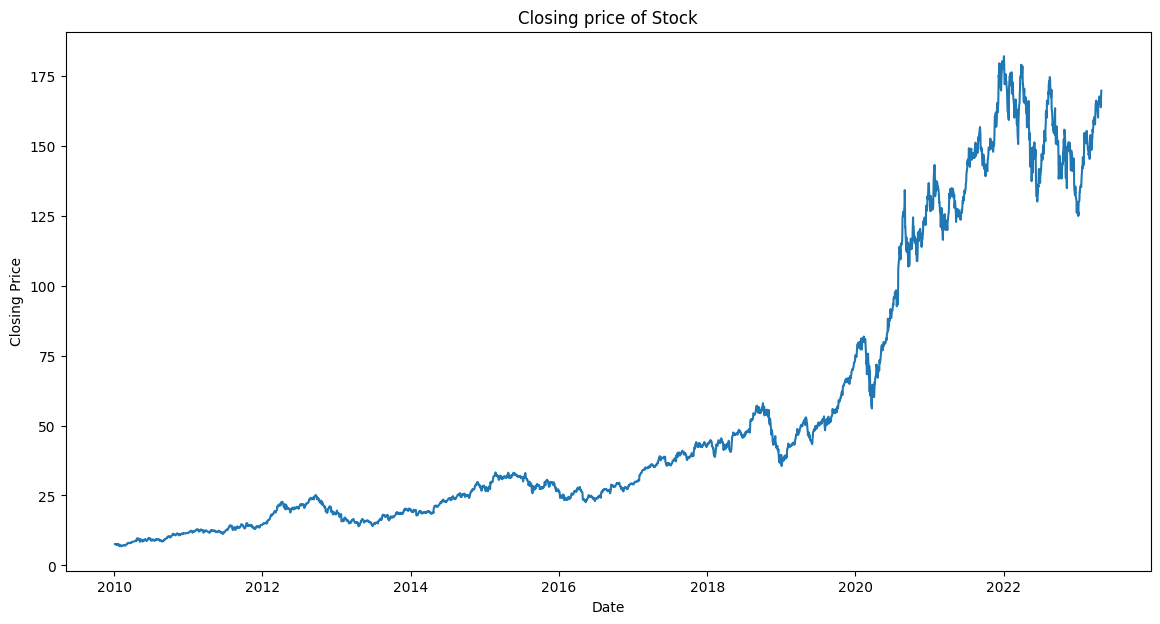

In [26]:
# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(apple_dta['Close'])
plt.title('Closing price of Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


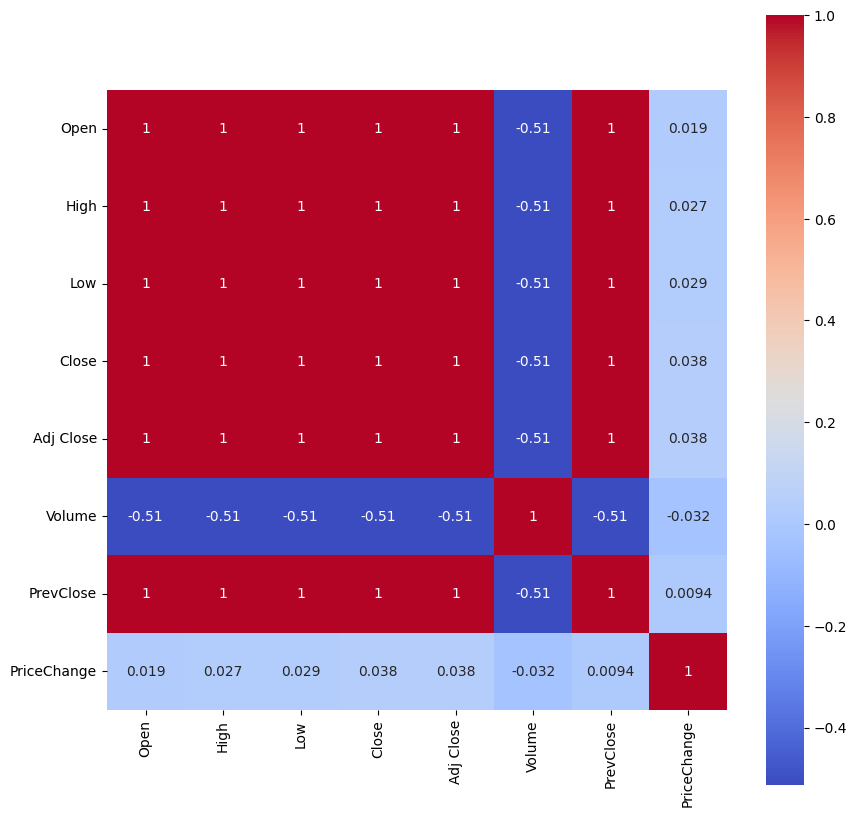

In [28]:
# Calculate correlations
corr = apple_dta.corr()

# Use seaborn to create a heatmap of the correlations
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm')
plt.show()

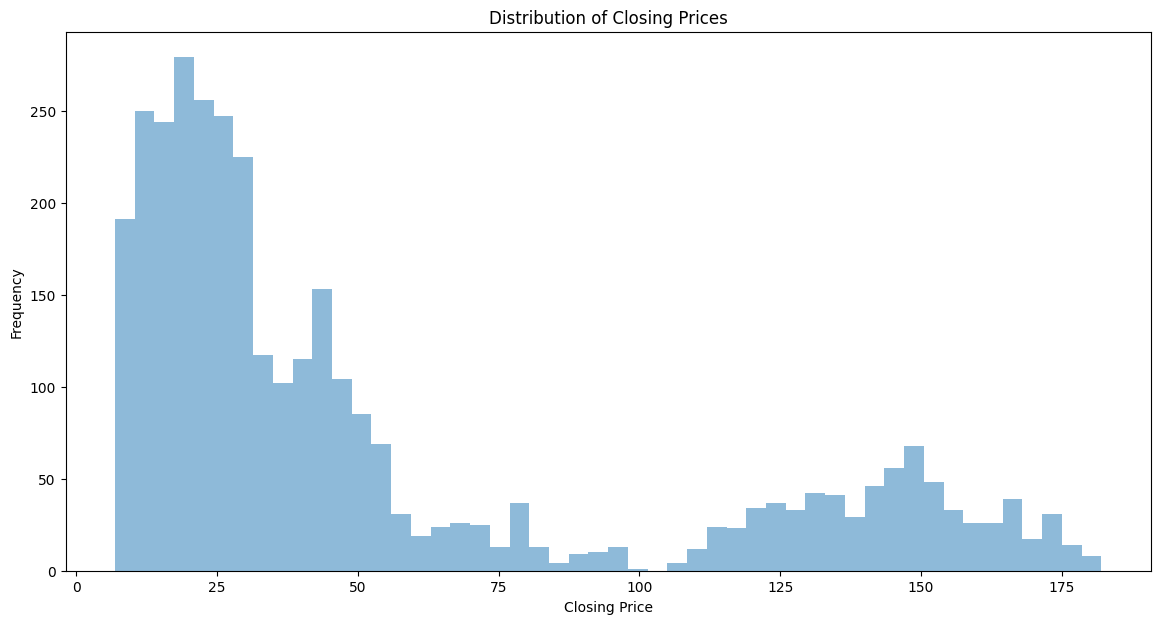

In [29]:
# Plot a histogram of the closing prices (Distribution of the data)
plt.figure(figsize=(14, 7))
plt.hist(apple_dta['Close'], bins=50, alpha=0.5)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

### META Stock Analysis

In [30]:
print(meta_dta.describe())

              Open         High          Low        Close    Adj Close  \
count  2754.000000  2754.000000  2754.000000  2754.000000  2754.000000   
mean    148.917977   150.836235   147.038885   148.971685   148.971685   
std      86.016060    87.098821    84.975147    86.051165    86.051165   
min      18.080000    18.270000    17.549999    17.730000    17.730000   
25%      78.557503    79.404999    77.910004    78.710001    78.710001   
50%     145.915001   148.164993   143.364998   146.024994   146.024994   
75%     192.625000   195.315006   189.674999   192.455002   192.455002   
max     381.679993   384.329987   378.809998   382.179993   382.179993   

             Volume    PrevClose  PriceChange  
count  2.754000e+03  2753.000000  2753.000000  
mean   3.117714e+07   148.938503     0.073407  
std    2.697541e+07    86.049175     4.236531  
min    5.913100e+06    17.730000   -85.240005  
25%    1.636850e+07    78.690002    -1.109985  
50%    2.330615e+07   146.009995     0.080002

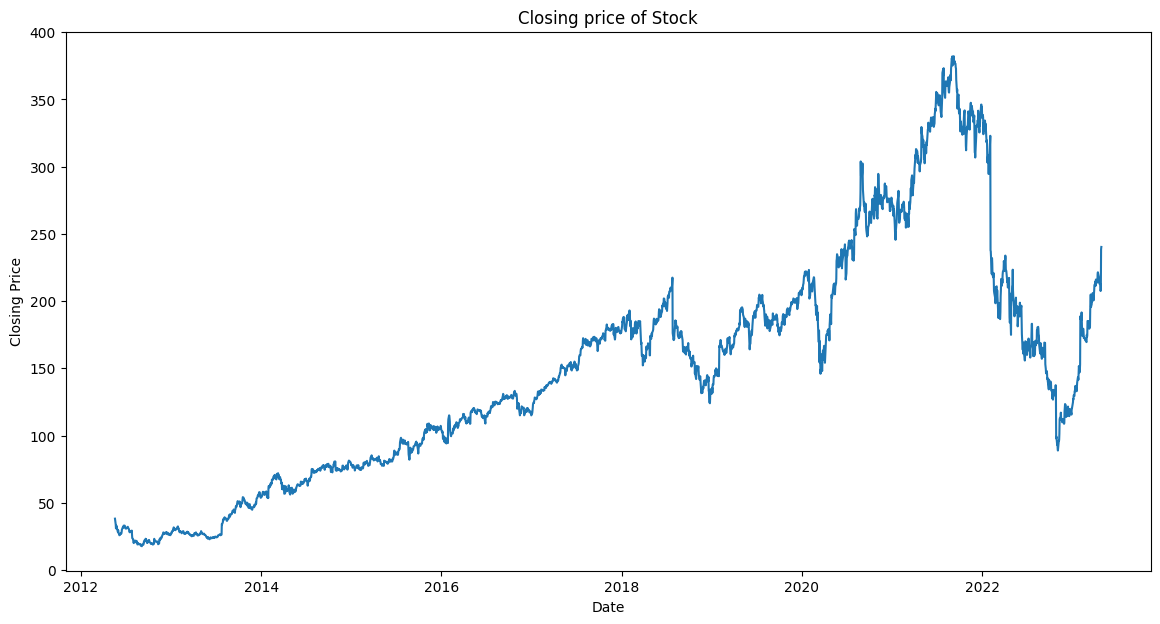

In [31]:
# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(meta_dta['Close'])
plt.title('Closing price of Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

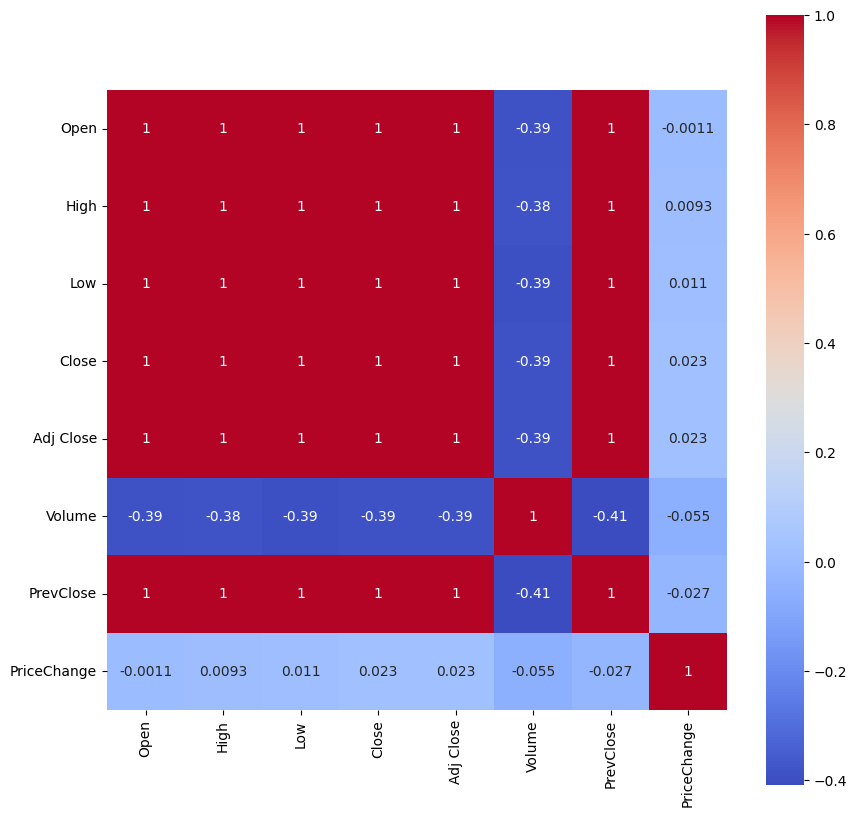

In [32]:
# Calculate correlations
corr = meta_dta.corr()

# Use seaborn to create a heatmap of the correlations
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm')
plt.show()

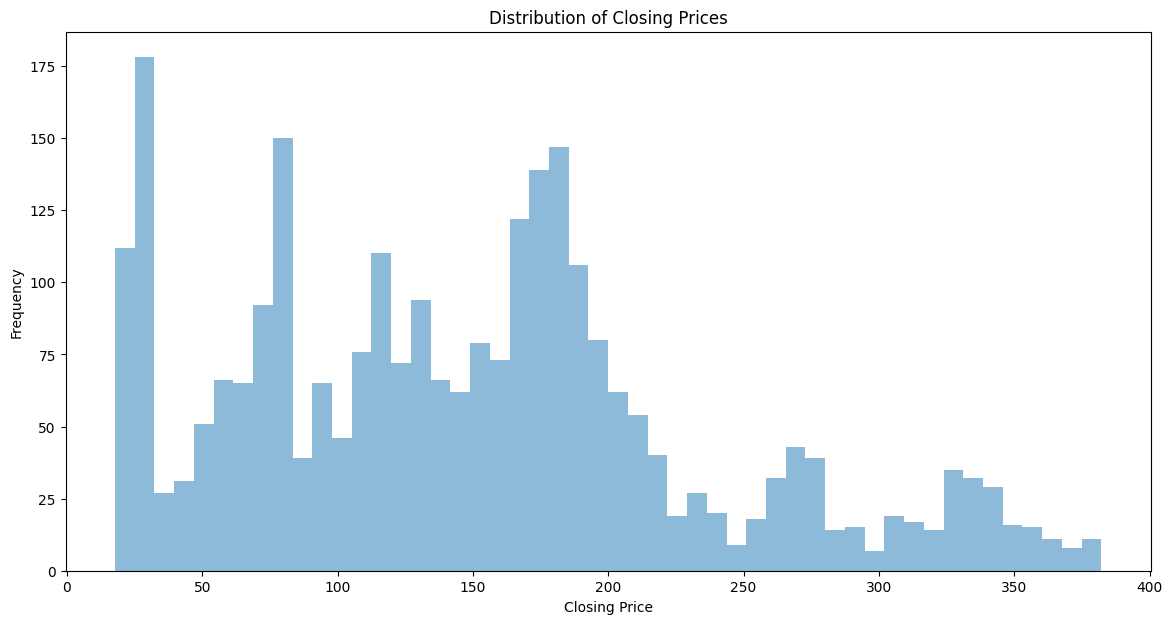

In [33]:
# Plot a histogram of the closing prices (data distribution)
plt.figure(figsize=(14, 7))
plt.hist(meta_dta['Close'], bins=50, alpha=0.5)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

### Nike Stock Analysis

In [34]:
print(nike_dta.describe())

              Open         High          Low        Close    Adj Close  \
count  3353.000000  3353.000000  3353.000000  3353.000000  3353.000000   
mean     65.958087    66.617267    65.297244    65.964895    62.794045   
std      40.606411    41.035981    40.141070    40.579346    40.809685   
min      15.405000    15.530000    15.222500    15.325000    13.042215   
25%      30.809999    31.090000    30.605000    30.875000    27.633921   
50%      56.000000    56.459999    55.570000    56.040001    52.026325   
75%      89.970001    90.639999    88.720001    89.559998    87.168419   
max     176.350006   179.100006   175.500000   177.509995   174.236038   

             Volume    PrevClose  PriceChange  
count  3.353000e+03  3352.000000  3352.000000  
mean   8.505546e+06    65.946770     0.032930  
std    5.048087e+06    40.571823     1.443551  
min    1.821900e+06    15.325000   -12.209999  
25%    5.659400e+06    30.866250    -0.380629  
50%    7.346100e+06    56.025000     0.024997

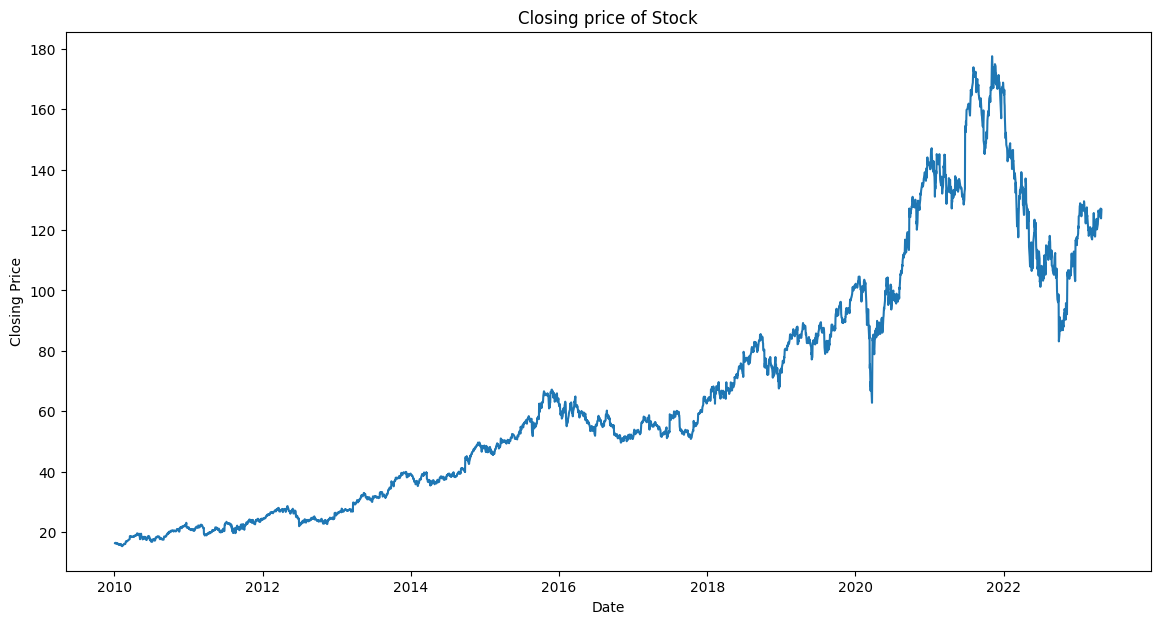

In [35]:
# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(nike_dta['Close'])
plt.title('Closing price of Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

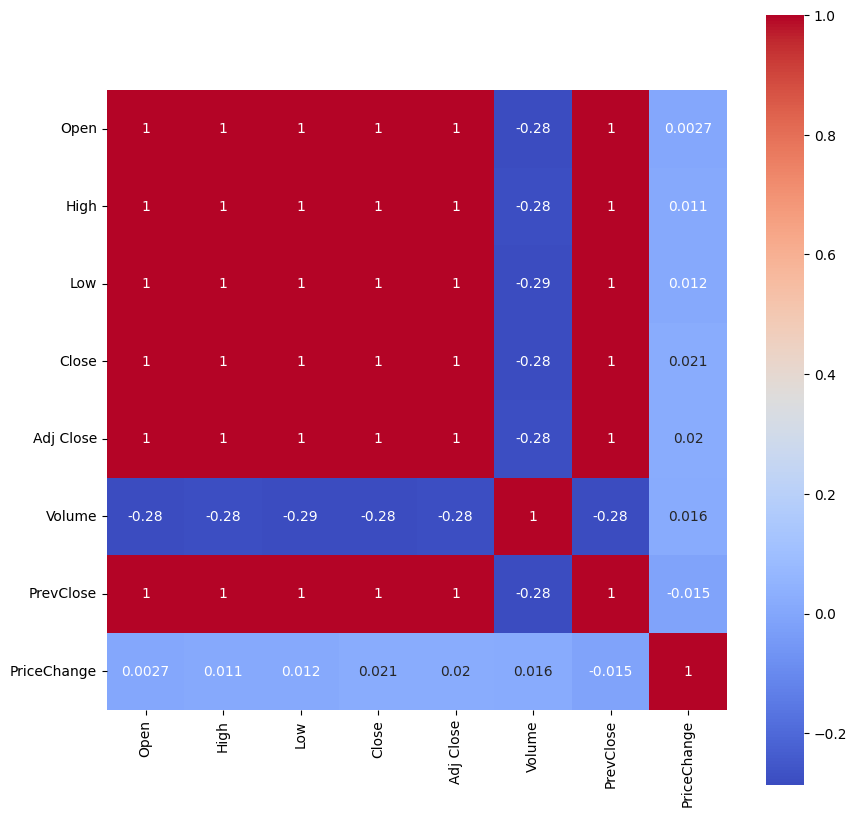

In [36]:
# Calculate correlations
corr = nike_dta.corr()

# Use seaborn to create a heatmap of the correlations
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm')
plt.show()

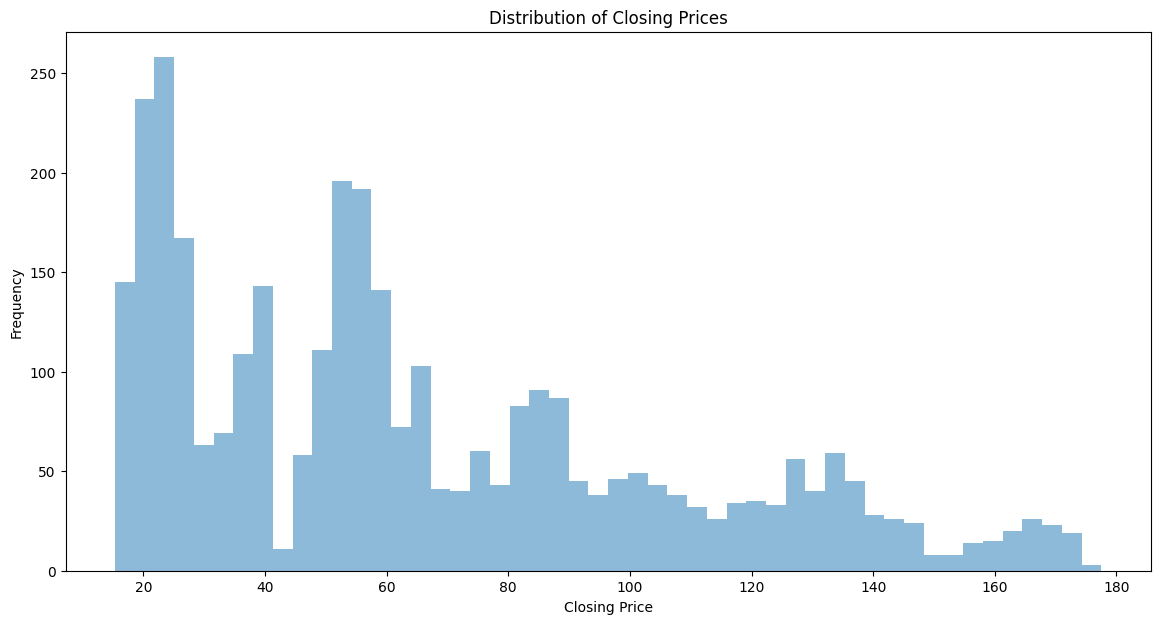

In [37]:
# Plot a histogram of the closing prices (Data distribution)
plt.figure(figsize=(14, 7))
plt.hist(nike_dta['Close'], bins=50, alpha=0.5)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


### SMP500 Stock Analysis

In [38]:
print(smp500_dta.describe())

              Open         High          Low        Close    Adj Close  \
count  3353.000000  3353.000000  3353.000000  3353.000000  3353.000000   
mean   2440.305218  2453.830686  2425.710981  2440.791431  2440.791431   
std    1008.452253  1014.883478  1001.523160  1008.466075  1008.466075   
min    1027.650024  1032.949951  1010.909973  1022.580017  1022.580017   
25%    1592.270020  1597.569946  1582.770020  1593.369995  1593.369995   
50%    2157.879883  2164.409912  2145.199951  2159.040039  2159.040039   
75%    3004.080078  3016.070068  2988.800049  3004.040039  3004.040039   
max    4804.509766  4818.620117  4780.040039  4796.560059  4796.560059   

             Volume    PrevClose  PriceChange  
count  3.353000e+03  3352.000000  3352.000000  
mean   3.943333e+09  2440.275713     0.905874  
std    9.723338e+08  1008.174225    30.370633  
min    1.025000e+09  1022.580017  -324.890137  
25%    3.350670e+09  1593.135010    -8.312561  
50%    3.777800e+09  2158.035034     1.229980

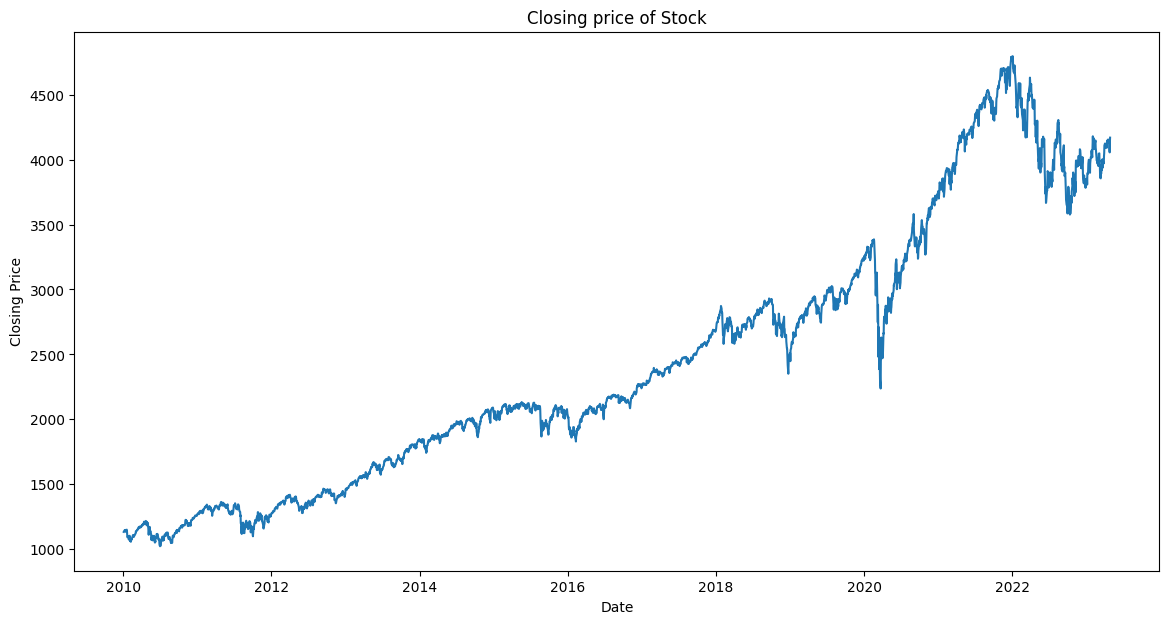

In [39]:
# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(smp500_dta['Close'])
plt.title('Closing price of Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

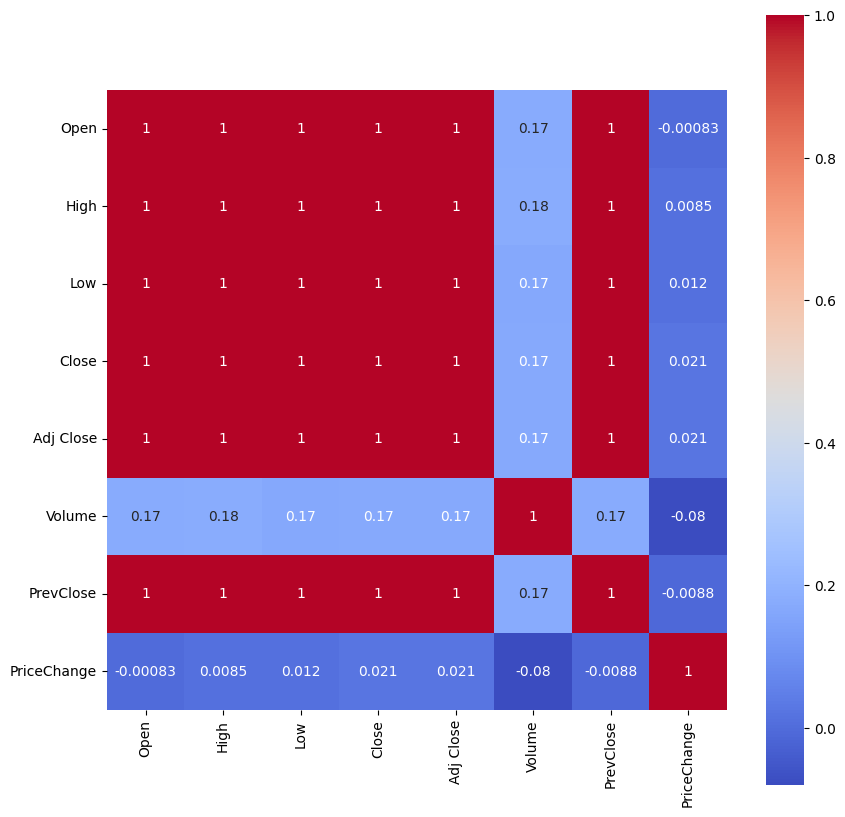

In [40]:
# Calculate correlations
corr = smp500_dta.corr()

# Use seaborn to create a heatmap of the correlations
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm')
plt.show()

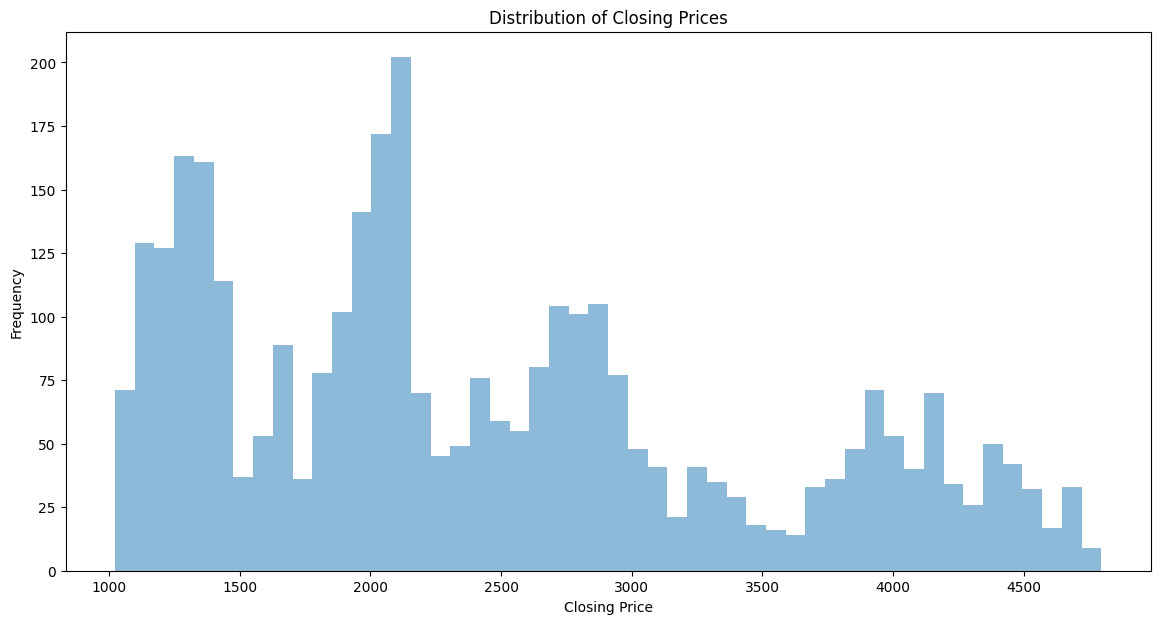

In [41]:
# Plot a histogram of the closing prices
plt.figure(figsize=(14, 7))
plt.hist(smp500_dta['Close'], bins=50, alpha=0.5)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

### Vanguard 500 Stock Analysis

In [42]:
print(vanguard_dta.describe())

              Open         High          Low        Close    Adj Close  \
count  3181.000000  3181.000000  3181.000000  3181.000000  3181.000000   
mean    230.441827   231.658419   229.091116   230.470195   210.526896   
std      90.473207    91.091943    89.799194    90.484726    96.037199   
min      99.139999   101.860001    98.239998   100.339996    79.369980   
25%     161.330002   162.070007   160.800003   161.399994   135.348099   
50%     207.919998   208.429993   207.330002   207.919998   185.084610   
75%     283.640015   285.640015   282.579987   283.929993   268.224396   
max     440.579987   441.260010   437.660004   439.250000   428.554688   

             Volume    PrevClose  PriceChange  
count  3.181000e+03  3180.000000  3180.000000  
mean   2.480157e+06   230.422528     0.088280  
std    2.373732e+06    90.459004     2.831959  
min    8.600000e+03   100.339996   -29.069992  
25%    8.768500e+05   161.384995    -0.800003  
50%    1.943100e+06   207.894997     0.120010

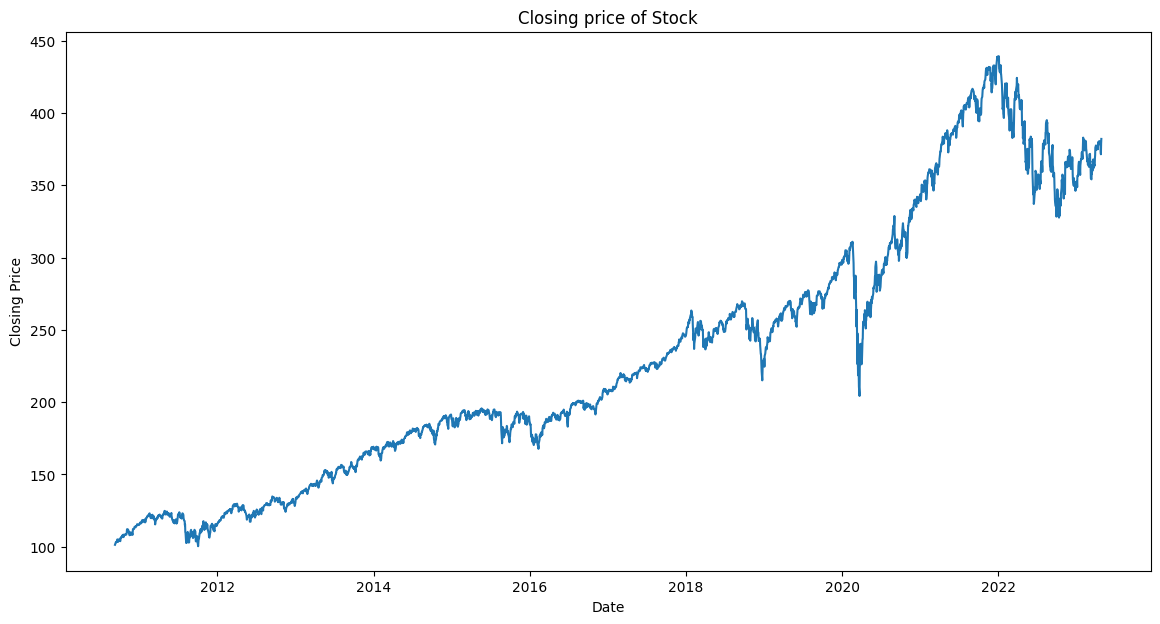

In [43]:
# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(vanguard_dta['Close'])
plt.title('Closing price of Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

                 Open      High       Low     Close  Adj Close    Volume  \
Open         1.000000  0.999884  0.999838  0.999718   0.999056  0.632076   
High         0.999884  1.000000  0.999755  0.999834   0.999334  0.636975   
Low          0.999838  0.999755  1.000000  0.999851   0.999015  0.624988   
Close        0.999718  0.999834  0.999851  1.000000   0.999327  0.630621   
Adj Close    0.999056  0.999334  0.999015  0.999327   1.000000  0.634546   
Volume       0.632076  0.636975  0.624988  0.630621   0.634546  1.000000   
PrevClose    0.999806  0.999733  0.999632  0.999510   0.998889  0.634976   
PriceChange  0.001056  0.007100  0.010863  0.019518   0.017857 -0.141661   

             PrevClose  PriceChange  
Open          0.999806     0.001056  
High          0.999733     0.007100  
Low           0.999632     0.010863  
Close         0.999510     0.019518  
Adj Close     0.998889     0.017857  
Volume        0.634976    -0.141661  
PrevClose     1.000000    -0.011786  
PriceChange

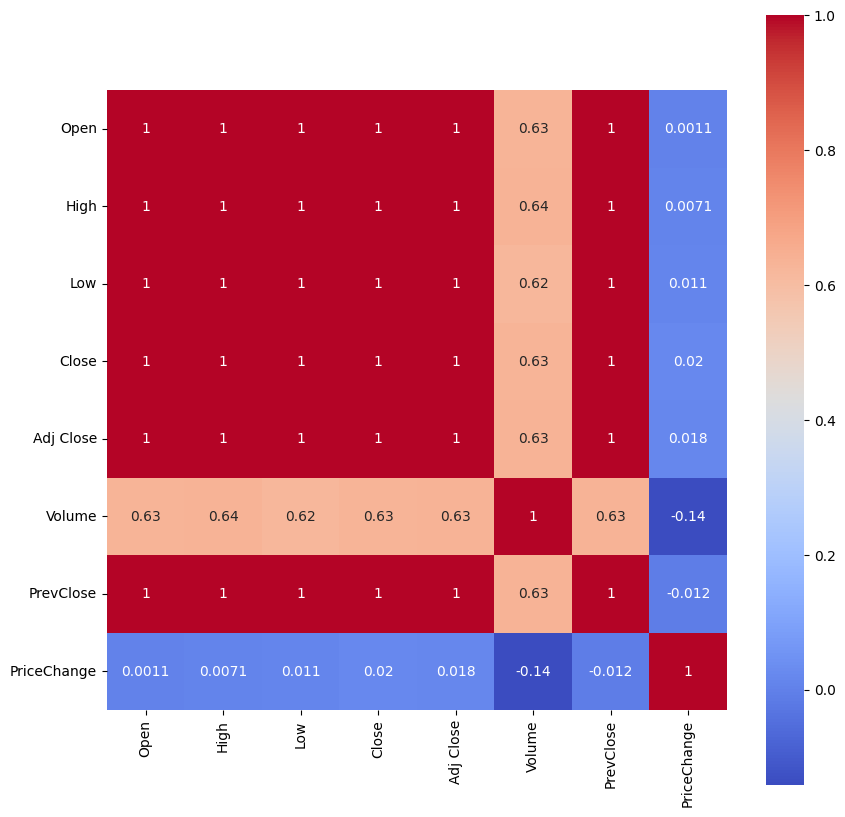

In [46]:
# Calculate correlations
corr = vanguard_dta.corr()
print(corr)

# Use seaborn to create a heatmap of the correlations
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, square=True, cmap='coolwarm')
plt.show()

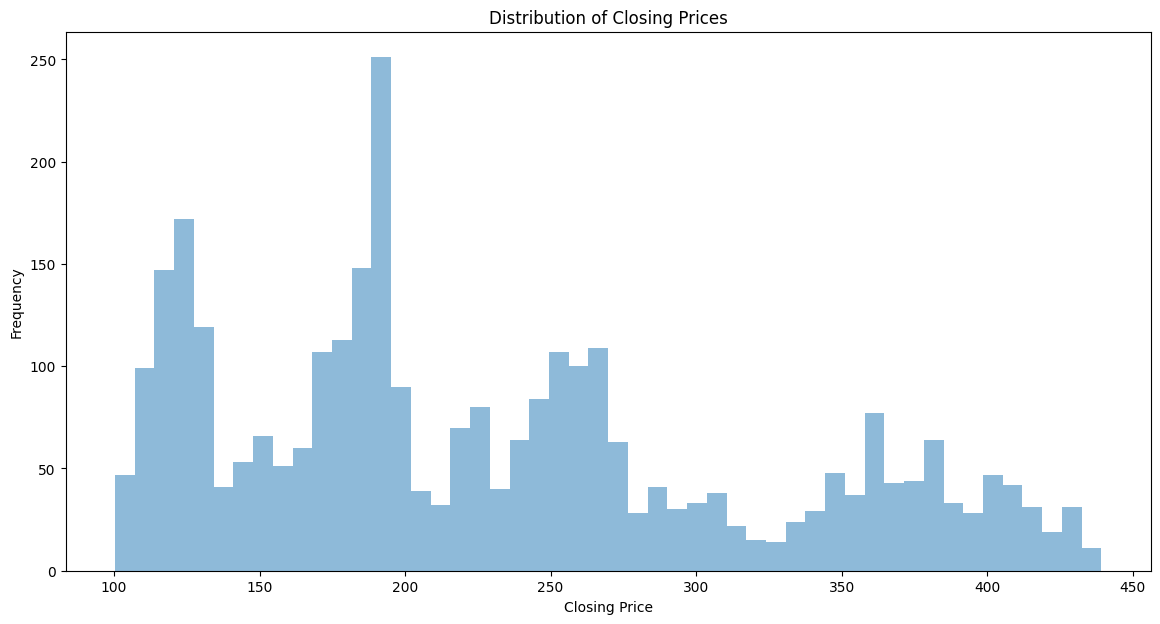

In [45]:
# Plot a histogram of the closing prices
plt.figure(figsize=(14, 7))
plt.hist(vanguard_dta['Close'], bins=50, alpha=0.5)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()


# Model Selection